<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter7CoherenceImaging/fisherInformationTwoPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolution and Coherence Measures
## David Brady
## University of Arizona

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from mpl_toolkits import mplot3d
plt.rcParams.update({'font.size': 22})

## Fisher information for a Gaussian focal spot

The model system response for point sources with mean position $\bar{x}$ and separation $\Delta$ with a Gaussian impulse response is
$$
\begin{array}{rl}
     h(x,{\bar x} , \Delta x)&= \frac{I_o}{\sigma \sqrt{2\pi}}\left [ e^{-\frac{(x-{\bar x}+\Delta )^2}{2\sigma^2}} +
     e^{-\frac{(x-{\bar x}-\Delta )^2}{2\sigma^2}}
     \right ]\\
     & = 2\frac{I_o}{\sigma \sqrt{2\pi}}e^{-\frac{(x-{\bar x})^2}{2\sigma^2}}e^{-\frac{\Delta^2}{2\sigma^2}}\cosh \left ( \frac{(x-{\bar x})\Delta }{\sigma^2}\right )
\end{array}$$

This yields
$$
\frac{\partial h}{\partial \bar{x}} = - \frac{2 I_o}{\sigma^3\sqrt{2 \pi}} e^{-\frac{(x - \bar{x})^2}{2 \sigma^2}} e^{-\frac{\Delta^2}{2 \sigma^2}}\left [(x - \bar{x}) \cosh \left( \frac{(x - \bar{x}) \Delta }{\sigma^2} \right)
-  \Delta  \sinh \left( \frac{(x - \bar{x}) \Delta }{ \sigma^2} \right)\right ].
$$

$$
\frac{\partial h}{\partial \Delta} = -\frac{2 I_o}{\sigma^3\sqrt{2 \pi}} e^{-\frac{(x - \bar{x})^2}{2 \sigma^2}} e^{-\frac{\Delta^2}{2 \sigma^2}}\left [\Delta \cosh \left( \frac{(x - \bar{x}) \Delta }{ \sigma^2} \right)
- (x-\bar{x}) \sinh \left( \frac{(x - \bar{x}) \Delta }{ \sigma^2} \right)\right ].
$$

note that $h(x,{\bar x} , \Delta x)$ is an even function of $(x-\bar{x})$, $\frac{\partial h}{\partial \bar{x}}$ is an odd function and $\frac{\partial h}{\partial \Delta}$ is an even function. This means that
$\frac{\frac{\partial h}{\partial \bar{x}}\frac{\partial h}{\partial \Delta}}{h}$ is odd and thus integrates to 0.


Note that the total energy inthe psf integrates to $2 I_o$.

The Fisher information coefficiencs are

$$
\begin{array}{rl}
I_{\bar{x}\bar{x}}&=\int \frac{ \left [\frac{\partial h}{\partial \bar{x}}\right ]^2}{h}dx\\
&=\frac{4I_o}{\sigma^4\sqrt{2\pi}}\int e^{-\frac{(x-{\bar x})^2}{2\sigma^2}}e^{-\frac{\Delta^2}{2\sigma^2}}\frac{\left [(x - \bar{x}) \cosh \left( \frac{(x - \bar{x}) \Delta }{\sigma^2} \right)
-  \Delta  \sinh \left( \frac{(x - \bar{x}) \Delta }{ \sigma^2} \right)\right ]^2}{\cosh \left ( \frac{(x-{\bar x})\Delta }{\sigma^2}\right )} dx
\end{array}
$$

$$
\begin{array}{rl}
I_{\Delta\Delta}&=\int \frac{ \left [\frac{\partial h}{\partial \Delta}\right ]^2}{h}dx\\
&=\frac{4I_o}{\sigma^4\sqrt{2\pi}}\int e^{-\frac{(x-{\bar x})^2}{2\sigma^2}}e^{-\frac{\Delta^2}{2\sigma^2}}\frac{\left [\Delta \cosh \left( \frac{(x - \bar{x}) \Delta }{\sigma^2} \right)
-  (x-{\bar x})  \sinh \left( \frac{(x - \bar{x}) \Delta }{ \sigma^2} \right)\right ]^2}{\cosh \left ( \frac{(x-{\bar x})\Delta }{\sigma^2}\right )} dx
\end{array}
$$


In [2]:
def h(x,d):
  h=np.sqrt(2/np.pi)*np.exp(-x**2/2)*np.exp(-d**2/2)*np.cosh(x*d)
  return h
def dhx(x,d):
  dhx=np.sqrt(2/np.pi)*np.exp(-x**2/2)*np.exp(-d**2/2)*(x*np.cosh(x*d)-d*np.sinh(x*d))
  return dhx
def dhd(x,d):
  dhd=np.sqrt(2/np.pi)*np.exp(-x**2/2)*np.exp(-d**2/2)*(d*np.cosh(x*d)-x*np.sinh(x*d))
  return dhd


In [3]:
# prompt: make a function to return the integral of dhx(x,d)**2/h(x,d) for x = -10 to 10 as a function of d

def integral_dhx2_h(d):
  integrand = lambda x: dhx(x, d)**2 / h(x, d)
  result, _ = quad(integrand, -20, 20)
  return result
def integral_dhd2_h(d):
  integrand = lambda x: dhd(x, d)**2 / h(x, d)
  result, _ = quad(integrand, -20, 20)
  return result


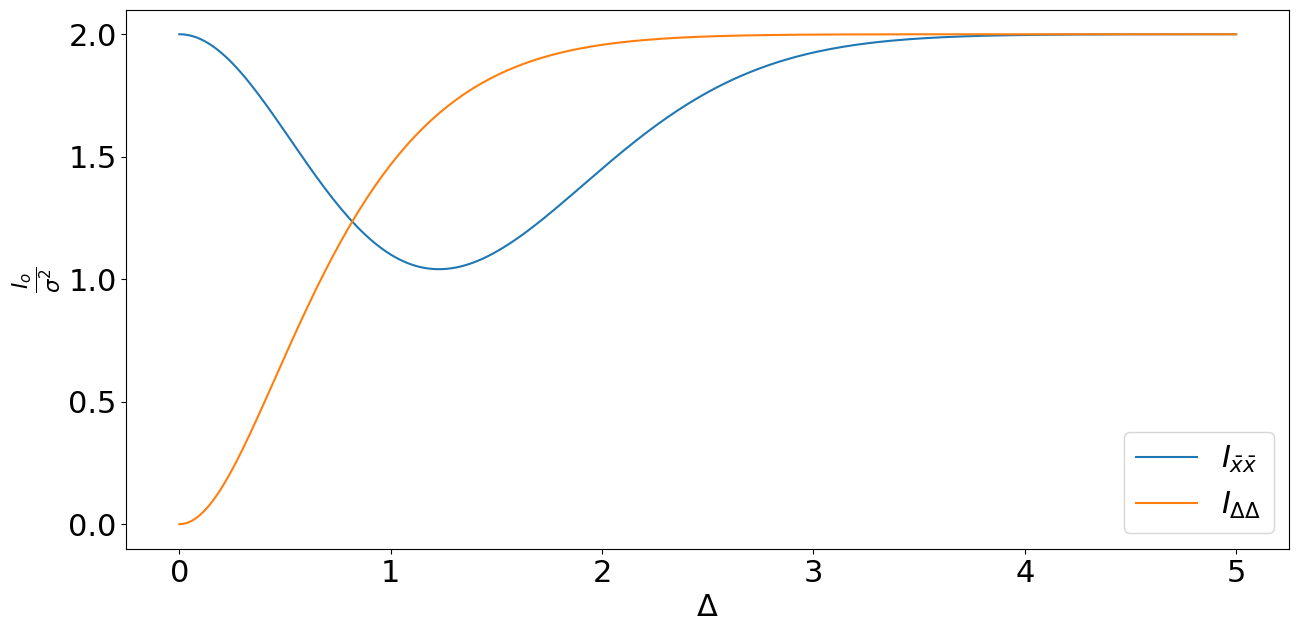

In [69]:
plt.figure(figsize=(15,7))
d=np.linspace(0,5,256)
plt.plot(d,np.vectorize(integral_dhx2_h)(d))
plt.plot(d,np.vectorize(integral_dhd2_h)(d))
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\frac{I_o}{\sigma^2}$')
plt.legend([r'$I_{\bar{x}\bar{x}}$',r'$I_{\Delta\Delta}$'])
plt.savefig('fisherGaussian.pdf')



## RSI



$$
\begin{array}{rl}
h(x,{\bar x} , \Delta)&= \frac{I_o}{X}\left [ 2- \cos (4\pi \frac{x (\bar{x}+\Delta)}{\lambda z})-\cos (4\pi \frac{x (\bar{x}-\Delta)}{\lambda z})
  \right ]\\
  &=\frac{2I_o}{X}\left [ 1-\cos(4\pi \frac{x \bar{x}}{\lambda z})\cos(4\pi \frac{x \Delta}{\lambda z})\right ]
  \end{array}
  $$
such that

$$
\frac{\partial h}{\partial \bar{x}}=-\frac{8\pi I_o x}{\lambda zX}\sin(4\pi \frac{x \bar{x}}{\lambda z})\cos(4\pi \frac{x \Delta}{\lambda z})$$
and
$$
\frac{\partial h}{\partial \Delta}=-\frac{8\pi I_o x}{\lambda zX}\cos(4\pi \frac{x \bar{x}}{\lambda z})\sin(4\pi \frac{x \Delta}{\lambda z})$$

$X$ is the extent of the interferometric window, such that the total power (adding the positive and negative channels) is again $2I_o$.

In this case,



$$I_{\bar{x}\bar{x}}=\frac{I_o}{X}\frac{36\pi^2}{(\lambda z)^2}\int_{-\frac{X}{2}}^{\frac{X}{2} } \frac{x^2\sin^2(4\pi \frac{x \bar{x}}{\lambda z})\cos^2(4\pi \frac{x \Delta}{\lambda z})}{1-\cos(4\pi \frac{x \bar{x}}{\lambda z})\cos(4\pi \frac{x \Delta}{\lambda z})}dx $$

$$I_{\Delta\Delta}=\frac{I_o}{X}\frac{36\pi^2}{(\lambda z)^2}\int_{-\frac{X}{2}}^{\frac{X}{2} } \frac{x^2\cos^2(4\pi \frac{x \bar{x}}{\lambda z})\sin^2(4\pi \frac{x \Delta}{\lambda z})}{1-\cos(4\pi \frac{x \bar{x}}{\lambda z})\cos(4\pi \frac{x \Delta}{\lambda z})}dx $$

$$I_{\bar{x}\Delta}=\frac{I_o}{X}\frac{9\pi^2}{(\lambda z)^2}\int_{-\frac{X}{2}}^{\frac{X}{2} } \frac{x^2\sin(8\pi \frac{x \bar{x}}{\lambda z})\sin(8\pi \frac{x \Delta}{\lambda z})}{1-\cos(4\pi \frac{x \bar{x}}{\lambda z})\cos(4\pi \frac{x \Delta}{\lambda z})}dx $$




In [4]:
def hRSI(x,b, d):
  h=2*(1-np.cos(4*np.pi*x*b)*np.cos(4*np.pi*x*d))+0.000000001
  return h
def dhxRSI(x,b,d):
  dhx=8*np.pi*x*np.sin(4*np.pi*x*b)*np.cos(4*np.pi*x*d)
  return dhx
def dhdRSI(x,b,d):
  dhd=8*np.pi*x*np.cos(4*np.pi*x*b)*np.sin(4*np.pi*x*d)
  return dhd


In [5]:
def integral_dhb2_RSI(b,d):
  integrand = lambda x: dhxRSI(x, b, d)**2 / hRSI(x,b, d)
  result, _ = quad(integrand, -.5, .5)
  return result
def integral_dhd2_RSI(b,d):
  integrand = lambda x: dhdRSI(x,b, d)**2 / hRSI(x,b, d)
  result, _ = quad(integrand, -.5, .5)
  return result
def integral_dhbd_RSI(b,d):
  integrand = lambda x: dhxRSI(x, b, d)* dhdRSI(x, b, d)/ hRSI(x, b, d)
  result, _ = quad(integrand, -.5,.5)
  return result


<ipython-input-5-f21af7dc9d82>:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  result, _ = quad(integrand, -.5, .5)
<ipython-input-5-f21af7dc9d82>:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = quad(integrand, -.5, .5)


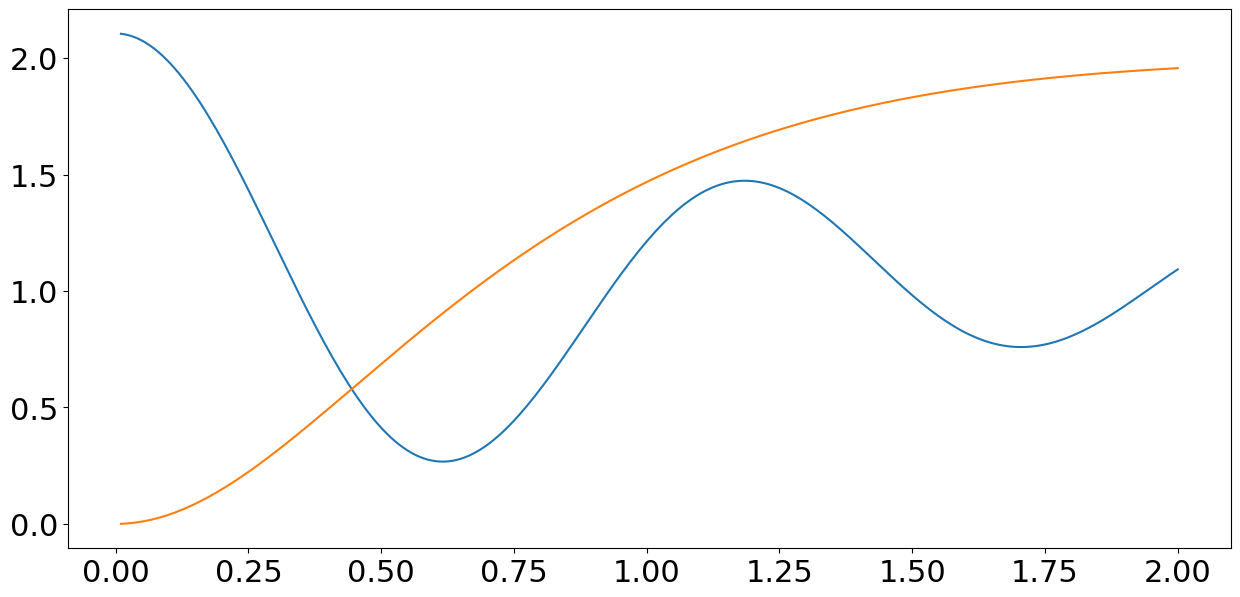

In [6]:
d=np.linspace(0.01,2,256)
plt.figure(figsize=(15,7))
plt.plot(d,np.vectorize(integral_dhd2_RSI)(0.000001,d)/25)
plt.plot(d,np.vectorize(integral_dhd2_h)(d))

In [ ]:
1/20


0.05

<ipython-input-5-f21af7dc9d82>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, -.5, .5)


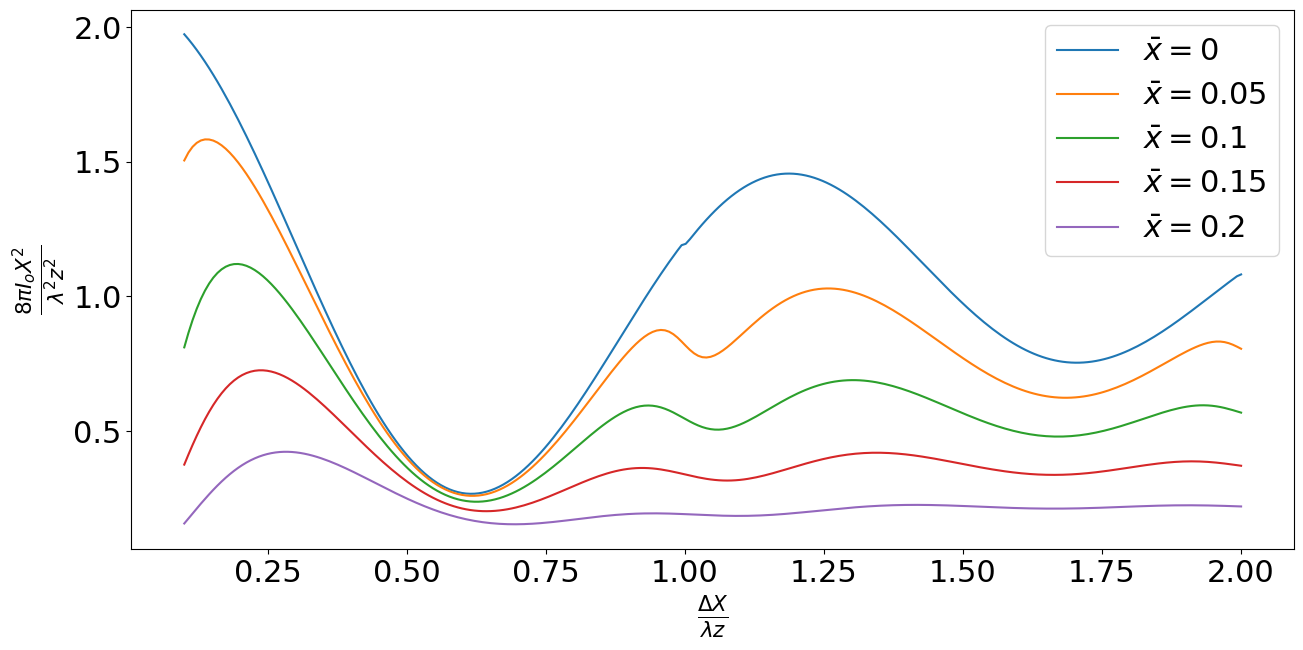

In [15]:
plt.figure(figsize=(15,7))
d=np.linspace(0.1,2,256)
for b in range(5):
  plt.plot(d,np.vectorize(integral_dhd2_RSI)(b/20+.001,d)/(8*np.pi))
plt.legend([r'$\bar{x}=0}$',r'$\bar{x}=0.05}$',r'$\bar{x}=0.1}$',r'$\bar{x}=0.15}$',r'$\bar{x}=0.2}$'])
plt.xlabel(r'$\frac{\Delta X}{\lambda z}$')
plt.ylabel(r'$\frac{8\pi I_o X^2}{\lambda^2 z^2}$')
plt.savefig('fisherRSI.pdf')

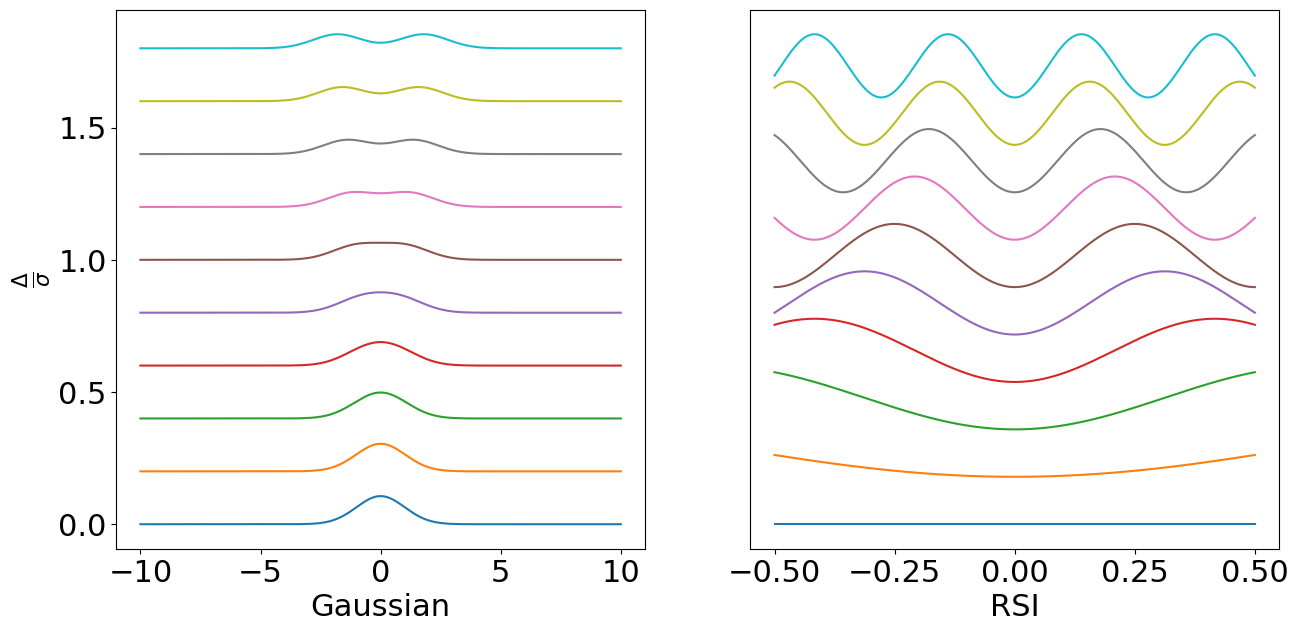

In [74]:
x=np.linspace(-10,10,1024)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
for d in range(10):
  plt.plot(x,(2*np.vectorize(h)(x,d*.2)+3*d)/15)
plt.xlabel('Gaussian')
plt.ylabel(r'$\frac{\Delta}{\sigma}$')
plt.subplot(1,2,2)
x=np.linspace(-.5,.5,1024)
for d in range(10):
  plt.plot(x,(np.vectorize(hRSI)(x,0, d*.2)+3*d)/15)
plt.tick_params(left = False, right = False , labelleft = False )
plt.xlabel('RSI')
plt.savefig('hRSI.pdf')

## MLE estimation Monte Carlo Simulations

In [19]:
### choose a value of x and d, generate data step 1, estimate xest
### generate data for new measurement centered on est estimate d
def data(x,d,N):
  g=np.random.poisson(N*h(x,d)*(x[2]-x[1]))/N
  return g
def dataRSI(x,b,d,N):
  g=np.random.poisson(N*hRSI(x,b,d)*(x[2]-x[1]))/N
  return g
def est(g,x):
  return np.average(x,weights=g)
def estd(g):
  return np.power(3*np.sum(g),1/2.)/(2*np.pi)
def estimateXD(N,xo,delta):
  #with N photons, use 0.5 N to estimate position xo by centroid, 0.5 N to estimate delta using RSI
  # xo should be between 1 and 3
  # delta should be between 0 and .25
  x=np.linspace(-10,10,2**12)
  g=data(x-xo,delta,.5*N)
  xest=est(g,x)
  xRSI=xo+np.linspace(-.5,.5,2**6)
  g=dataRSI(xRSI-xest,xo-xest,delta,.5*N)
  return xest, estd(g)


In [61]:
estimateXD(2**10,2.3,0.1)


(2.292127023834341, 0.1026537816384605)

In [63]:
# for delta equal to  0.05, 0.075, 0.1, 0.125, 0.15. 0.175, 0.2
# xo=2.3
# N=10^12
# calculate the mean and variance of estimates of delta
N=10**6
values=[0.001, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025]
means=np.zeros(len(values))
std=np.zeros(len(values))
for pop in range(len(values)):
  delta=values[pop]
  testvals=np.zeros(1000)
  for test in range(1000):
    testvals[test]=estimateXD(N,2.3,delta)[1]
  means[pop]=np.mean(testvals)
  std[pop]=np.std(testvals)
print(means)
print(std)

[0.00136327 0.00523244 0.00774643 0.0102948  0.01539389 0.02048686
 0.02559168]
[0.00043908 0.00024248 0.00021938 0.00020836 0.00019633 0.00020869
 0.00019571]


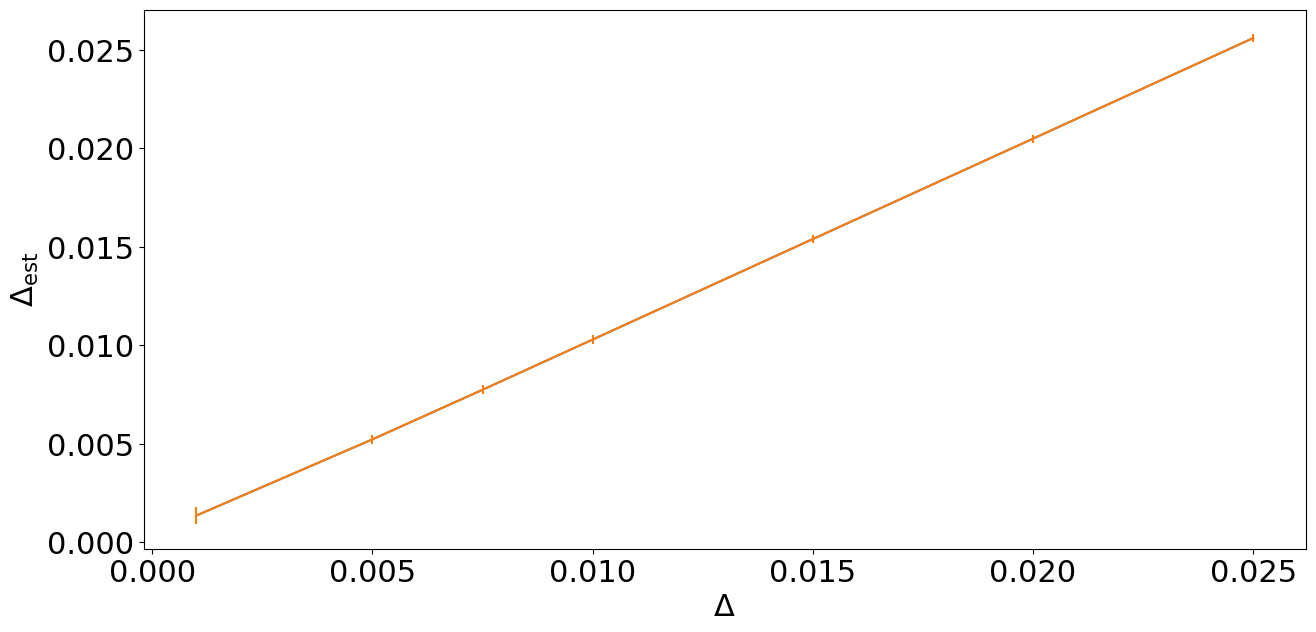

In [66]:
plt.figure(figsize=(15,7))
plt.plot(values,means)
plt.errorbar(values,means,yerr=std)
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\Delta_{\rm est}$')
plt.savefig('mle.pdf')



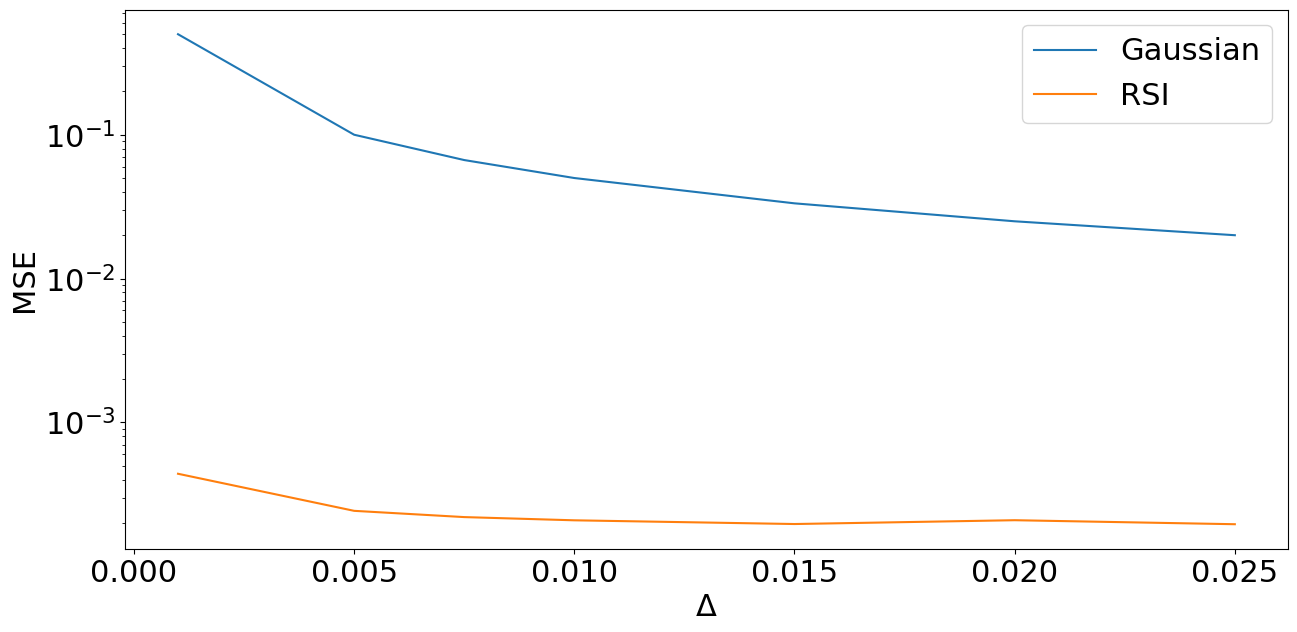

In [67]:
plt.figure(figsize=(15,7))
plt.semilogy(values,1/np.sqrt(10**6*np.vectorize(integral_dhd2_h)(values)))
plt.semilogy(values,std)
plt.legend(['Gaussian','RSI'])
plt.xlabel(r'$\Delta$')
plt.ylabel(r'MSE')
plt.savefig('mseDelta.pdf')